In [30]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

In [39]:
unet_mnist = {'D_loss_train': [0.6940469741821289, 0.6931100487709045, 0.6931193470954895, 0.6931293606758118, 0.6931278705596924, 0.6931328773498535, 0.6931352615356445, 0.693134605884552, 0.6931370496749878, 0.6931467056274414], 'D_loss_val': [0.6928510665893555, 0.6929336190223694, 0.6929962038993835, 0.6931735873222351, 0.6929918527603149, 0.6931704878807068, 0.6931619644165039, 0.6932634711265564, 0.693123459815979, 0.6931254863739014], 'G_loss_train': [0.7186223268508911, 0.7015143632888794, 0.6999456882476807, 0.6992642879486084, 0.6987758874893188, 0.6984456181526184, 0.698118269443512, 0.6979945302009583, 0.6978681087493896, 0.6976073980331421], 'G_loss_val': [0.6993333101272583, 0.6996963024139404, 0.6966477036476135, 0.6938610076904297, 0.6990854144096375, 0.6958608031272888, 0.6988745331764221, 0.6889939904212952, 0.6987853050231934, 0.6969918012619019], 'm_loss_train': [0.021023932844400406, 0.008074386045336723, 0.006680520251393318, 0.006034357938915491, 0.005543449427932501, 0.005283756647258997, 0.005049503408372402, 0.004922166001051664, 0.0047617400996387005, 0.00467375572770834], 'm_loss_val': [0.009004936553537846, 0.006874712184071541, 0.0059211524203419685, 0.005954830441623926, 0.00537510821595788, 0.005491991993039846, 0.005111641250550747, 0.0051605552434921265, 0.004823701456189156, 0.004636136349290609]}
unet_fmnist = {'D_loss_train': [0.697651207447052, 0.6930133104324341, 0.6931136846542358, 0.6931321024894714, 0.6931428909301758, 0.6931413412094116, 0.6931495666503906, 0.6931512951850891, 0.6931493878364563, 0.6931578516960144], 'D_loss_val': [0.6923500895500183, 0.6934460401535034, 0.6929484009742737, 0.6933268308639526, 0.693183958530426, 0.693068265914917, 0.6931053400039673, 0.6936577558517456, 0.6931394934654236, 0.6929295659065247], 'G_loss_train': [0.7401178479194641, 0.7069401741027832, 0.7035258412361145, 0.7020823955535889, 0.7014641761779785, 0.7008118629455566, 0.7005619406700134, 0.6999425292015076, 0.700053870677948, 0.6999450922012329], 'G_loss_val': [0.7016570568084717, 0.6877210140228271, 0.702517032623291, 0.7006795406341553, 0.7075170874595642, 0.6972360014915466, 0.7004590630531311, 0.7030268311500549, 0.7000874280929565, 0.6964523792266846], 'm_loss_train': [0.03827686980366707, 0.012623017653822899, 0.009953233413398266, 0.008870397694408894, 0.00809086486697197, 0.007598184980452061, 0.007269337307661772, 0.006889220327138901, 0.006797781214118004, 0.006670817732810974], 'm_loss_val': [0.014662956818938255, 0.011461139656603336, 0.00890433881431818, 0.008901742286980152, 0.008096840232610703, 0.007288484368473291, 0.006936964113265276, 0.008085403591394424, 0.006932125426828861, 0.006496246438473463]}
lenet_mnist = {'D_loss_train': [0.6931486129760742, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339], 'D_loss_val': [0.6931474804878235, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339], 'G_loss_train': [0.725075900554657, 0.7151851654052734, 0.7127575874328613, 0.711401104927063, 0.7105427384376526, 0.7098727822303772, 0.7093561887741089, 0.7089906334877014, 0.7086527347564697, 0.7083719968795776], 'G_loss_val': [0.7172903418540955, 0.7136110663414001, 0.7120257019996643, 0.7108546495437622, 0.7102057933807373, 0.7095969319343567, 0.7091279625892639, 0.7087564468383789, 0.7084464430809021, 0.7081403136253357], 'm_loss_train': [0.032114434987306595, 0.02208739146590233, 0.019624073058366776, 0.018254848197102547, 0.017395436763763428, 0.016725609079003334, 0.016209082677960396, 0.01584342122077942, 0.015505571849644184, 0.015224834904074669], 'm_loss_val': [0.024073580279946327, 0.02050751820206642, 0.018912125378847122, 0.017716163769364357, 0.017072485759854317, 0.016457276418805122, 0.01597313955426216, 0.015628397464752197, 0.015299424529075623, 0.015002438798546791]}
lenet_fmnist = {'D_loss_train': [0.6931486129760742, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339], 'D_loss_val': [0.6931474804878235, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339, 0.6931473612785339], 'G_loss_train': [0.7238826155662537, 0.7156097292900085, 0.7134958505630493, 0.7122744917869568, 0.7114499807357788, 0.7108212113380432, 0.7103989124298096, 0.7100344896316528, 0.7096871137619019, 0.7094175815582275], 'G_loss_val': [0.7173300981521606, 0.7143726348876953, 0.7128751277923584, 0.7118522524833679, 0.7114710211753845, 0.7106168866157532, 0.7101383805274963, 0.7098515629768372, 0.7095853686332703, 0.7093541026115417], 'm_loss_train': [0.030610470101237297, 0.022417068481445312, 0.020334403961896896, 0.019126160070300102, 0.018302587792277336, 0.017674103379249573, 0.017251674085855484, 0.016887297853827477, 0.016539854928851128, 0.016270508989691734], 'm_loss_val': [0.0241004079580307, 0.021157560870051384, 0.019709166139364243, 0.018685199320316315, 0.01831931248307228, 0.017497185617685318, 0.016987863928079605, 0.016692429780960083, 0.016434062272310257, 0.01621769368648529]}
linear_mnist = {'D_loss_train': [0.6959559321403503, 0.6937533617019653, 0.6933814883232117, 0.6930937767028809, 0.6930562257766724, 0.6931020021438599, 0.6931285858154297, 0.6931386590003967, 0.6931332349777222, 0.6930601000785828], 'D_loss_val': [0.6233959197998047, 0.6882113814353943, 0.6927973031997681, 0.6927571296691895, 0.6929111480712891, 0.6928166151046753, 0.6929084658622742, 0.6932144165039062, 0.6926721334457397, 0.6925209760665894], 'G_loss_train': [0.8923910856246948, 0.8539129495620728, 0.7456011772155762, 0.7316796779632568, 0.7245588302612305, 0.7210081219673157, 0.7198490500450134, 0.7178289294242859, 0.7165964245796204, 0.7161259651184082], 'G_loss_val': [0.9892879128456116, 0.7649821639060974, 0.7376859188079834, 0.7273378968238831, 0.7228130102157593, 0.7226331233978271, 0.7205546498298645, 0.7217980623245239, 0.715857207775116, 0.7165733575820923], 'm_loss_train': [0.10779856890439987, 0.09723976254463196, 0.05165832117199898, 0.0385112464427948, 0.03213122487068176, 0.028434135019779205, 0.025945361703634262, 0.02429729513823986, 0.022950544953346252, 0.022459449246525764], 'm_loss_val': [0.11143099516630173, 0.07881081104278564, 0.042818162590265274, 0.03394391015172005, 0.029653357341885567, 0.02635032869875431, 0.02492242492735386, 0.02491440623998642, 0.02146337553858757, 0.021334942430257797]}
linear_fmnist = {'D_loss_train': [0.6989367604255676, 0.6932366490364075, 0.6932152509689331, 0.6932604908943176, 0.6932180523872375, 0.6932365298271179, 0.6932464241981506, 0.6932564377784729, 0.6932104825973511, 0.6931725144386292], 'D_loss_val': [0.6931031346321106, 0.6930248141288757, 0.6931718587875366, 0.6932157278060913, 0.6934749484062195, 0.6930601596832275, 0.6932585835456848, 0.6932222247123718, 0.6931082010269165, 0.6930144429206848], 'G_loss_train': [0.7525026798248291, 0.722220778465271, 0.7156344652175903, 0.7125136256217957, 0.7106987237930298, 0.7097102403640747, 0.7090229392051697, 0.7083988785743713, 0.7080615162849426, 0.7077014446258545], 'G_loss_val': [0.7280570268630981, 0.7190902233123779, 0.7142911553382874, 0.7101719379425049, 0.712982177734375, 0.7083048820495605, 0.7107002139091492, 0.7088224291801453, 0.7083945870399475, 0.7083901762962341], 'm_loss_train': [0.056929271668195724, 0.025447268038988113, 0.021422624588012695, 0.01905537210404873, 0.017612429335713387, 0.01655123569071293, 0.015849603340029716, 0.015252644196152687, 0.014862462878227234, 0.014546387828886509], 'm_loss_val': [0.028044825419783592, 0.02309725247323513, 0.01996077038347721, 0.018412167206406593, 0.017282888293266296, 0.016118811443448067, 0.01563684083521366, 0.014996029436588287, 0.014847389422357082, 0.013997486792504787]}

print(linear_mnist['m_loss_val'][9],lenet_mnist['m_loss_val'][9],unet_mnist['m_loss_val'][9])
print(linear_fmnist['m_loss_val'][9],lenet_fmnist['m_loss_val'][9],unet_fmnist['m_loss_val'][9])

0.021334942430257797 0.015002438798546791 0.004636136349290609
0.013997486792504787 0.01621769368648529 0.006496246438473463


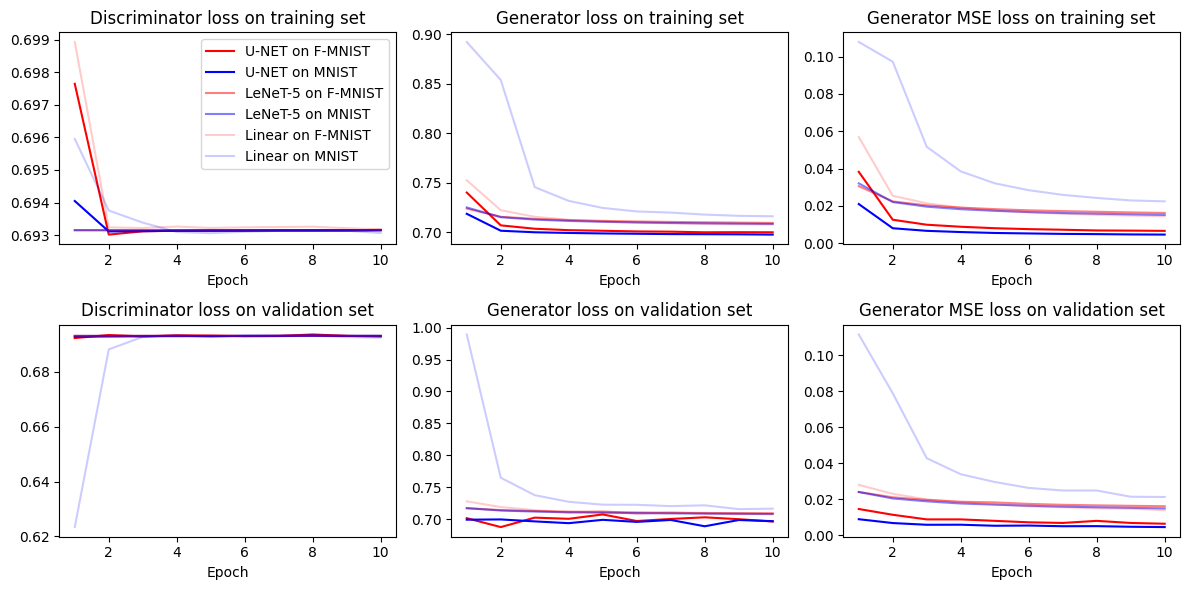

In [34]:
# Create three subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes[0,0].plot(epoch,unet_fmnist['D_loss_train'],label='U-NET on F-MNIST', color='red')
axes[0,1].plot(epoch,unet_fmnist['G_loss_train'],label='U-NET on F-MNIST', color='red')
axes[0,2].plot(epoch,unet_fmnist['m_loss_train'],label='U-NET on F-MNIST', color='red')
axes[1,0].plot(epoch,unet_fmnist['D_loss_val'],label='U-NET on F-MNIST', color='red')
axes[1,1].plot(epoch,unet_fmnist['G_loss_val'],label='U-NET on F-MNIST', color='red')
axes[1,2].plot(epoch,unet_fmnist['m_loss_val'],label='U-NET on F-MNIST', color='red')

axes[0,0].plot(epoch,unet_mnist['D_loss_train'],label='U-NET on MNIST', color='blue')
axes[0,1].plot(epoch,unet_mnist['G_loss_train'],label='U-NET on MNIST', color='blue')
axes[0,2].plot(epoch,unet_mnist['m_loss_train'],label='U-NET on MNIST', color='blue')
axes[1,0].plot(epoch,unet_mnist['D_loss_val'],label='U-NET on MNIST', color='blue')
axes[1,1].plot(epoch,unet_mnist['G_loss_val'],label='U-NET on MNIST', color='blue')
axes[1,2].plot(epoch,unet_mnist['m_loss_val'],label='U-NET on MNIST', color='blue')

axes[0,0].plot(epoch,lenet_fmnist['D_loss_train'],label='LeNeT-5 on F-MNIST', color='red', alpha=0.5)
axes[0,1].plot(epoch,lenet_fmnist['G_loss_train'],label='LeNeT-5 on F-MNIST', color='red', alpha=0.5)
axes[0,2].plot(epoch,lenet_fmnist['m_loss_train'],label='LeNeT-5 on F-MNIST', color='red', alpha=0.5)
axes[1,0].plot(epoch,lenet_fmnist['D_loss_val'],label='LeNeT-5 on F-MNIST', color='red', alpha=0.5)
axes[1,1].plot(epoch,lenet_fmnist['G_loss_val'],label='LeNeT-5 on F-MNIST', color='red', alpha=0.5)
axes[1,2].plot(epoch,lenet_fmnist['m_loss_val'],label='LeNeT-5 on F-MNIST', color='red', alpha=0.5)

axes[0,0].plot(epoch,lenet_mnist['D_loss_train'],label='LeNeT-5 on MNIST', color='blue', alpha=0.5)
axes[0,1].plot(epoch,lenet_mnist['G_loss_train'],label='LeNeT-5 on MNIST', color='blue', alpha=0.5)
axes[0,2].plot(epoch,lenet_mnist['m_loss_train'],label='LeNeT-5 on MNIST', color='blue', alpha=0.5)
axes[1,0].plot(epoch,lenet_mnist['D_loss_val'],label='LeNeT-5 on MNIST', color='blue', alpha=0.5)
axes[1,1].plot(epoch,lenet_mnist['G_loss_val'],label='LeNeT-5 on MNIST', color='blue', alpha=0.5)
axes[1,2].plot(epoch,lenet_mnist['m_loss_val'],label='LeNeT-5 on MNIST', color='blue', alpha=0.5)

axes[0,0].plot(epoch,linear_fmnist['D_loss_train'],label='Linear on F-MNIST', color='red', alpha=0.2)
axes[0,1].plot(epoch,linear_fmnist['G_loss_train'],label='Linear on F-MNIST', color='red', alpha=0.2)
axes[0,2].plot(epoch,linear_fmnist['m_loss_train'],label='Linear on F-MNIST', color='red', alpha=0.2)
axes[1,0].plot(epoch,linear_fmnist['D_loss_val'],label='Linear on F-MNIST', color='red', alpha=0.2)
axes[1,1].plot(epoch,linear_fmnist['G_loss_val'],label='Linear on F-MNIST', color='red', alpha=0.2)
axes[1,2].plot(epoch,linear_fmnist['m_loss_val'],label='Linear on F-MNIST', color='red', alpha=0.2)

axes[0,0].plot(epoch,linear_mnist['D_loss_train'],label='Linear on MNIST', color='blue', alpha=0.2)
axes[0,1].plot(epoch,linear_mnist['G_loss_train'],label='Linear on MNIST', color='blue', alpha=0.2)
axes[0,2].plot(epoch,linear_mnist['m_loss_train'],label='Linear on MNIST', color='blue', alpha=0.2)
axes[1,0].plot(epoch,linear_mnist['D_loss_val'],label='Linear on MNIST', color='blue', alpha=0.2)
axes[1,1].plot(epoch,linear_mnist['G_loss_val'],label='Linear on MNIST', color='blue', alpha=0.2)
axes[1,2].plot(epoch,linear_mnist['m_loss_val'],label='Linear on MNIST', color='blue', alpha=0.2)

axes[0,0].set_title('Discriminator loss on training set')
axes[0,1].set_title('Generator loss on training set')
axes[0,2].set_title('Generator MSE loss on training set')
axes[1,0].set_title('Discriminator loss on validation set')
axes[1,1].set_title('Generator loss on validation set')
axes[1,2].set_title('Generator MSE loss on validation set')

axes[0,0].set_xlabel('Epoch')
axes[0,1].set_xlabel('Epoch')
axes[0,2].set_xlabel('Epoch')
axes[1,0].set_xlabel('Epoch')
axes[1,1].set_xlabel('Epoch')
axes[1,2].set_xlabel('Epoch')
axes[0,0].legend()

plt.tight_layout()
